In [1]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsorted

import numpy as np
from deepymod.analysis import load_tensorboard

In [2]:
# settings
sns.set(context='paper', style='white')
col_width = 5.5 # neurips style column width in inches

In [3]:
# loading data
df_warm = load_tensorboard("runs/warm_run_0/")
df_cold = load_tensorboard("runs/cold_run_0/")
df_pinn = load_tensorboard("runs/pinn_run_0/")

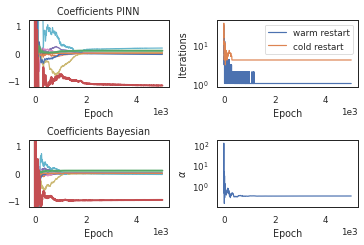

In [26]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(0.9 * col_width, 0.6 * col_width), constrained_layout=True)


ax = axes[0, 0]
coeff_keys = natsorted(filter(lambda key: key.find('coeff') == 0, df_pinn.keys()))
ax.plot(df_pinn.index, df_pinn[coeff_keys])
ax.plot(df_pinn.index, df_pinn[coeff_keys[2]], linewidth=2)
ax.plot(df_pinn.index, df_pinn[coeff_keys[5]], linewidth=2)
ax.set_xlabel('Epoch')
ax.ticklabel_format(axis='x', style='sci', scilimits=[0, 0])
ax.set_title('Coefficients PINN')
ax.set_ylim([-1.2, 1.2])


ax = axes[1, 0]
coeff_keys = natsorted(filter(lambda key: key.find('coeff') == 0, df_warm.keys()))
ax.plot(df_warm.index, df_warm[coeff_keys])
ax.plot(df_warm.index, df_warm[coeff_keys[2]], linewidth=2)
ax.plot(df_warm.index, df_warm[coeff_keys[5]], linewidth=2)
ax.set_xlabel('Epoch')
ax.ticklabel_format(axis='x', style='sci', scilimits=[0, 0])
ax.set_title('Coefficients Bayesian')
ax.set_ylim([-1.2, 1.2])

ax = axes[0, 1]
ax.plot(df_warm.index, df_warm.its, label='warm restart')
ax.plot(df_cold.index, df_cold.its, label='cold restart')
ax.set_yscale('log')
ax.set_ylabel('Iterations')
ax.set_xlabel('Epoch')
ax.ticklabel_format(axis='x', style='sci', scilimits=[0, 0])
ax.legend(loc='upper right')

ax = axes[1, 1]
ax.plot(df_warm.index, df_warm.alpha)
ax.set_yscale('log')
ax.set_ylabel(r'$\alpha$')
ax.set_xlabel('Epoch')
ax.ticklabel_format(axis='x', style='sci', scilimits=[0, 0])

plt.savefig('bayesian_regression_in_depth.pdf', bbox_inches='tight')

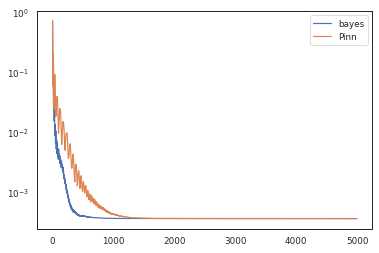

In [8]:
plt.semilogy(df_warm.index, df_warm.mse, label='bayes')
plt.semilogy(df_pinn.index, df_pinn.mse, label='Pinn')

plt.legend()

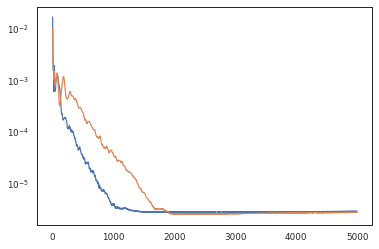

In [9]:
plt.semilogy(df_warm.index, df_warm.reg)
plt.semilogy(df_pinn.index, df_pinn.reg)

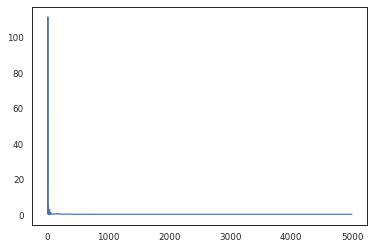

In [10]:
plt.plot(df_warm.index, df_warm.alpha)

(-1.0, 1.0)

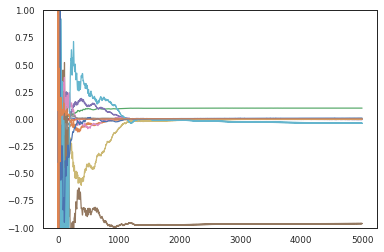

In [11]:
coeff_keys = natsorted(filter(lambda key: key.find('coeff') == 0, df_warm.keys()))
plt.plot(df_warm.index, df_warm[coeff_keys])
plt.ylim([-1, 1])
#ax.plot(df_warm.index, df_warm[coeff_keys[2]], linewidth=2)
#ax.plot(df_warm.index, df_warm[coeff_keys[5]], linewidth=2)

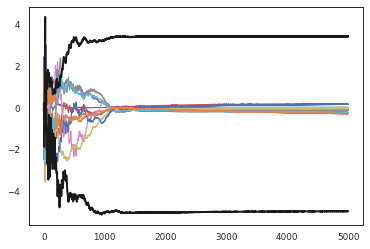

In [12]:
coeff_keys = natsorted(filter(lambda key: key.find('bayes') == 0, df_warm.keys()))
plt.plot(df_warm.index, df_warm[coeff_keys])
#plt.ylim([-0, 10])
plt.plot(df_warm.index, df_warm[coeff_keys[2]], linewidth=2, color='k')
plt.plot(df_warm.index, df_warm[coeff_keys[5]], linewidth=2, color='k')

(-1.0, 1.0)

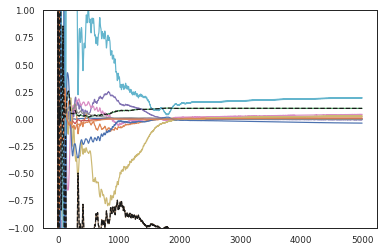

In [13]:
coeff_keys = natsorted(filter(lambda key: key.find('coeff') == 0, df_pinn.keys()))
plt.plot(df_pinn.index, df_pinn[coeff_keys])
plt.plot(df_pinn.index, df_pinn[coeff_keys[2]], 'k--')
plt.plot(df_pinn.index, df_pinn[coeff_keys[5]], 'k--')
plt.ylim([-1, 1])

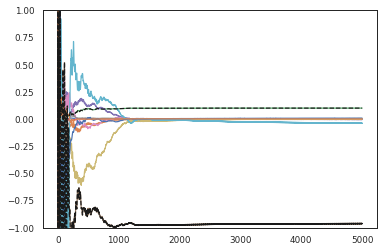

In [14]:
coeff_keys = natsorted(filter(lambda key: key.find('coeff') == 0, df_warm.keys()))
plt.plot(df_warm.index, df_warm[coeff_keys])
plt.ylim([-1, 1])
plt.plot(df_warm.index, df_warm[coeff_keys[2]], 'k--')
plt.plot(df_warm.index, df_warm[coeff_keys[5]], 'k--')

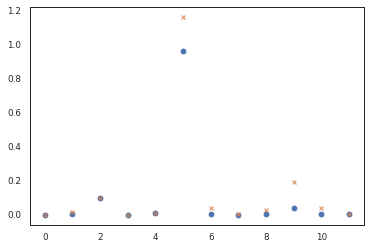

In [27]:
coeff_keys_warm = natsorted(filter(lambda key: key.find('coeff') == 0, df_warm.keys()))
plt.plot(np.abs(df_warm[coeff_keys_warm].tail(1).to_numpy().squeeze()), 'o')
coeff_keys_pinn = natsorted(filter(lambda key: key.find('coeff') == 0, df_pinn.keys()))
plt.plot(np.abs(df_pinn[coeff_keys_pinn].tail(1).to_numpy().squeeze()), 'x')

In [82]:
true_coeffs = np.zeros((12, ))
true_coeffs[2] = 0.1
true_coeffs[5] = -1

In [83]:
np.mean(np.abs(true_coeffs - df_pinn[coeff_keys_pinn].tail(1).to_numpy().squeeze()))

0.1041528107908865

In [84]:
np.mean(np.abs(true_coeffs - df_warm[coeff_keys_warm].tail(1).to_numpy().squeeze()))

0.12249568175757304

In [97]:
from jax import numpy as jnp, random
from modax.data.burgers import burgers

x = jnp.linspace(-3, 4, 50)
t = jnp.linspace(0.5, 5.0, 20)
t_grid, x_grid = jnp.meshgrid(t, x, indexing="ij")
u = burgers(x_grid, t_grid, 0.1, 1.0)


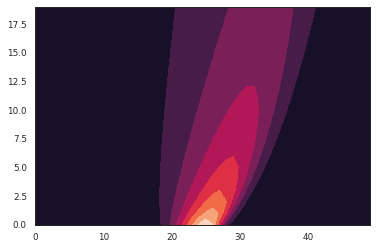

In [98]:
plt.contourf(u)

(0.2, 0.4)

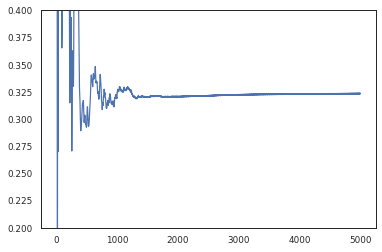

In [23]:
plt.plot(df_warm.index, df_warm.alpha)
plt.ylim([0.2, 0.4])